# Lotka-Volterra Predator-Prey Simulation with Reinforcement Learning

This notebook implements the classic Lotka-Volterra predator-prey model and explores how reinforcement learning can be used to manage ecosystem dynamics. The simulation models the population dynamics between prey and predator species over time.

## Overview
- **Lotka-Volterra Model**: Mathematical model describing predator-prey population dynamics
- **Reinforcement Learning**: Agent learns to take actions to maintain population stability
- **Visualization**: Interactive plots to explore system behavior under different conditions

## 1. Import Required Libraries

First, let's import all the necessary libraries for our simulation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Lotka-Volterra Model

The Lotka-Volterra equations describe the dynamics of two species:
- **dx/dt = αx - βxy** (prey equation)
- **dy/dt = δxy - γy** (predator equation)

Where:
- x = prey population
- y = predator population
- α = prey growth rate
- β = predation rate
- δ = efficiency of turning prey into predators
- γ = predator death rate

In [2]:
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    """
    Lotka-Volterra differential equations
    
    Parameters:
    - state: [x, y] where x=prey, y=predator
    - t: time
    - alpha: prey growth rate
    - beta: predator effect on prey
    - delta: predator benefit from prey
    - gamma: predator mortality rate
    
    Returns:
    - [dx/dt, dy/dt]: rate of change for both populations
    """
    x, y = state
    dx = alpha * x - beta * x * y  # Prey growth
    dy = delta * x * y - gamma * y  # Predator growth
    return [dx, dy]

print("Lotka-Volterra function defined successfully!")

Lotka-Volterra function defined successfully!


## 3. Set Model Parameters and Initial Conditions

Now let's define the ecological parameters and initial population states:

In [3]:
parameters = {
    'alpha': 0.1,   # prey growth rate
    'beta': 0.02,   # predator effect on prey
    'delta': 0.01,  # predator benefit from prey
    'gamma': 0.1    # predator mortality rate
}

initial_state = [40, 9]  # initial number of [prey, predators]
times = np.linspace(0, 200, 201)  # time points

print(f"Parameters: {parameters}")
print(f"Initial state: {initial_state[0]} prey, {initial_state[1]} predators")
print(f"Time range: 0 to {times[-1]} with {len(times)} points")

Parameters: {'alpha': 0.1, 'beta': 0.02, 'delta': 0.01, 'gamma': 0.1}
Initial state: 40 prey, 9 predators
Time range: 0 to 200.0 with 201 points


## 4. Configure Reinforcement Learning Settings

Set up the RL environment for ecosystem management. The agent will learn to take actions to maintain population stability:

In [4]:
# RL parameters
learning_rate = 0.1      # Learning rate
discount_factor = 0.9    # Discount factor
epsilon = 0.1            # Exploration rate

# Discretize state space
prey_bins = np.arange(0, 151, 10)
predator_bins = np.arange(0, 151, 10)
num_prey_states = len(prey_bins)
num_predator_states = len(predator_bins)

# Action space
actions = ["do_nothing", "add_prey", "remove_predators"]
num_actions = len(actions)

# Initialize Q-table
q_table = np.zeros((num_prey_states, num_predator_states, num_actions))

print("RL settings initialized successfully!")
print(f"State space: {num_prey_states} x {num_predator_states} = {num_prey_states * num_predator_states} states")
print(f"Action space: {num_actions} actions")
print(f"Q-table dimensions: {q_table.shape}")
print(f"Available actions: {actions}")

RL settings initialized successfully!
State space: 16 x 16 = 256 states
Action space: 3 actions
Q-table dimensions: (16, 16, 3)
Available actions: ['do_nothing', 'add_prey', 'remove_predators']


## 5. Implement RL Helper Functions

These functions handle state discretization, action selection, and reward calculation:

In [5]:
def get_state_indices(prey_pop, predator_pop):
    """Function to discretize continuous state into bins"""
    prey_index = np.argmin(np.abs(prey_bins - prey_pop))
    predator_index = np.argmin(np.abs(predator_bins - predator_pop))
    return prey_index, predator_index

def choose_action(prey_index, predator_index, epsilon):
    """Function to choose action (epsilon-greedy)"""
    if random.random() < epsilon:
        # Explore: choose random action
        return random.randint(0, num_actions - 1)
    else:
        # Exploit: choose best action from Q-table
        q_values = q_table[prey_index, predator_index, :]
        return np.argmax(q_values)

def calculate_reward(prey_pop, predator_pop):
    """Function to calculate reward"""
    # Goal: maintain stable populations (both above minimum thresholds)
    min_prey = 5
    min_predators = 2
    
    if prey_pop < min_prey or predator_pop < min_predators:
        return -100  # Large penalty for extinction
    else:
        return 1     # Small reward for survival

print("RL helper functions defined successfully!")

RL helper functions defined successfully!


In [6]:
# Test the helper functions
print("Testing helper functions...")
test_indices = get_state_indices(40, 9)
print(f"State indices for (40, 9): {test_indices}")
test_action = choose_action(test_indices[0], test_indices[1], 0.5)
print(f"Random action chosen: {actions[test_action]}")
test_reward = calculate_reward(40, 9)
print(f"Reward for (40, 9): {test_reward}")

# Test edge cases
test_reward_extinction = calculate_reward(2, 1)
print(f"Reward for extinction scenario (2, 1): {test_reward_extinction}")

Testing helper functions...
State indices for (40, 9): (np.int64(4), np.int64(1))
Random action chosen: remove_predators
Reward for (40, 9): 1
Reward for extinction scenario (2, 1): -100


## 6. Run Basic Lotka-Volterra Simulation

Let's run the basic simulation without RL intervention to see the natural dynamics:

In [7]:
print("Running basic Lotka-Volterra simulation...")
solution = odeint(lotka_volterra, initial_state, times, args=(
    parameters['alpha'], parameters['beta'], 
    parameters['delta'], parameters['gamma']
))

print(f"Simulation completed!")
print(f"Final populations: {solution[-1][0]:.1f} prey, {solution[-1][1]:.1f} predators")
print(f"Max prey population: {np.max(solution[:, 0]):.1f}")
print(f"Max predator population: {np.max(solution[:, 1]):.1f}")
print(f"Min prey population: {np.min(solution[:, 0]):.1f}")
print(f"Min predator population: {np.min(solution[:, 1]):.1f}")

Running basic Lotka-Volterra simulation...
Simulation completed!
Final populations: 0.9 prey, 2.1 predators
Max prey population: 42.8
Max predator population: 21.4
Min prey population: 0.6
Min predator population: 0.3


## 7. Visualize Population Dynamics

Create comprehensive visualizations of the population dynamics:

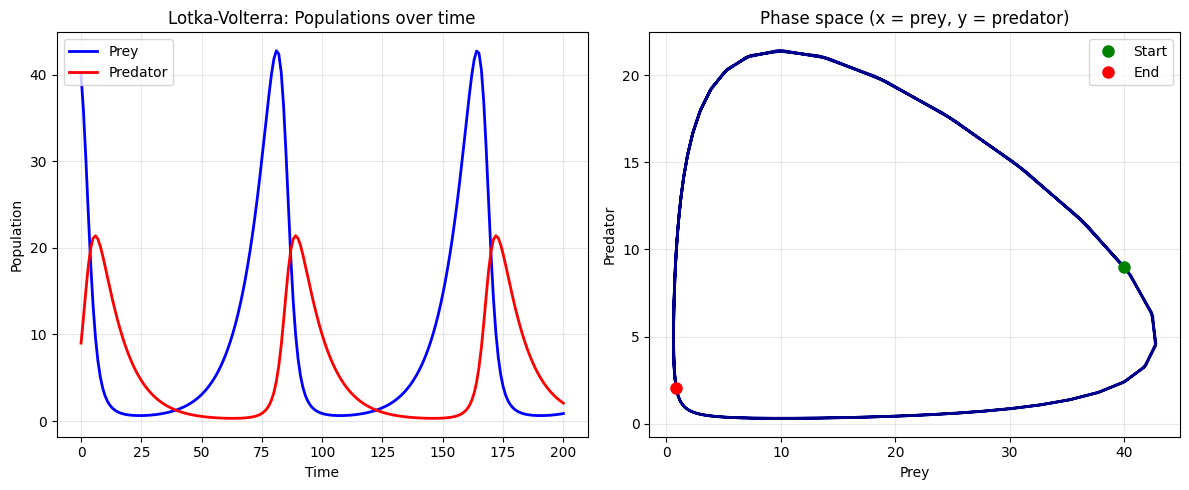

In [8]:
# Create the visualization
plt.figure(figsize=(12, 5))

# 1. Populations over time
plt.subplot(1, 2, 1)
plt.plot(times, solution[:, 0], 'b-', label='Prey', linewidth=2)
plt.plot(times, solution[:, 1], 'r-', label='Predator', linewidth=2)
plt.title('Lotka-Volterra: Populations over time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Phase space
plt.subplot(1, 2, 2)
plt.plot(solution[:, 0], solution[:, 1], 'darkblue', linewidth=2)
plt.plot(initial_state[0], initial_state[1], 'go', markersize=8, label='Start')
plt.plot(solution[-1, 0], solution[-1, 1], 'ro', markersize=8, label='End')
plt.title('Phase space (x = prey, y = predator)')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Perform Parameter Sensitivity Analysis

Explore how different parameter values affect the system dynamics:

In [9]:
print("Running parameter sensitivity analysis...")
alpha_values = [0.05, 0.1, 0.15, 0.2]
sensitivity_results = []

for alpha_val in alpha_values:
    temp_params = parameters.copy()
    temp_params['alpha'] = alpha_val
    
    temp_solution = odeint(lotka_volterra, initial_state, times, args=(
        temp_params['alpha'], temp_params['beta'], 
        temp_params['delta'], temp_params['gamma']
    ))
    sensitivity_results.append((alpha_val, temp_solution))

print(f"Analyzed {len(alpha_values)} different alpha values")

Running parameter sensitivity analysis...
Analyzed 4 different alpha values


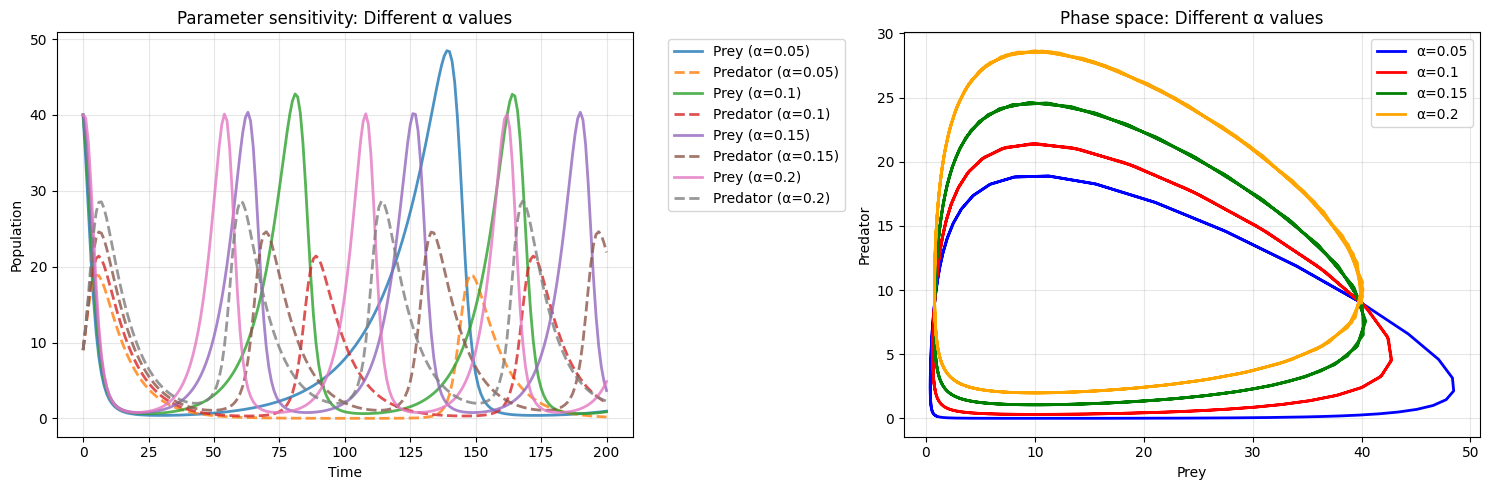

In [10]:
# Visualize parameter sensitivity
plt.figure(figsize=(15, 5))

# Plot 1: Population dynamics for different alpha values
plt.subplot(1, 2, 1)
for alpha_val, sol in sensitivity_results:
    plt.plot(times, sol[:, 0], label=f'Prey (α={alpha_val})', linestyle='-', alpha=0.8, linewidth=2)
    plt.plot(times, sol[:, 1], label=f'Predator (α={alpha_val})', linestyle='--', alpha=0.8, linewidth=2)

plt.title('Parameter sensitivity: Different α values')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Phase space for different alpha values
plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green', 'orange']
for i, (alpha_val, sol) in enumerate(sensitivity_results):
    plt.plot(sol[:, 0], sol[:, 1], color=colors[i], linewidth=2, 
             label=f'α={alpha_val}')

plt.title('Phase space: Different α values')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Analyze Different Initial Conditions

Explore how different starting populations affect the system trajectory:

In [11]:
print("Running initial conditions analysis...")
initial_conditions = [
    [20, 5],
    [40, 9],   # original values
    [60, 15],
    [30, 20]
]

initial_results = []
for init_cond in initial_conditions:
    temp_solution = odeint(lotka_volterra, init_cond, times, args=(
        parameters['alpha'], parameters['beta'], 
        parameters['delta'], parameters['gamma']
    ))
    initial_results.append((init_cond, temp_solution))

print(f"Analyzed {len(initial_conditions)} different initial conditions")

Running initial conditions analysis...
Analyzed 4 different initial conditions


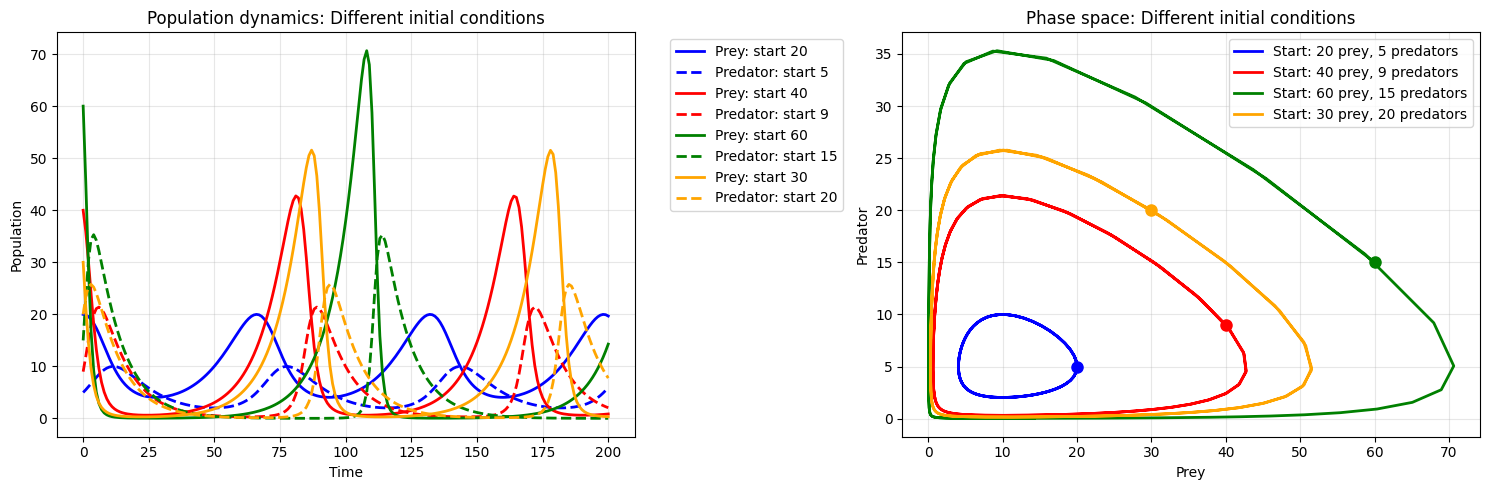


Basic simulation completed successfully!
Next step: Add RL training loop...


In [12]:
# Visualize different initial conditions
plt.figure(figsize=(15, 5))

# Plot 1: Population dynamics over time
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green', 'orange']
for i, (init_cond, sol) in enumerate(initial_results):
    plt.plot(times, sol[:, 0], color=colors[i], linestyle='-', linewidth=2, 
             label=f'Prey: start {init_cond[0]}')
    plt.plot(times, sol[:, 1], color=colors[i], linestyle='--', linewidth=2, 
             label=f'Predator: start {init_cond[1]}')

plt.title('Population dynamics: Different initial conditions')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Phase space trajectories
plt.subplot(1, 2, 2)
for i, (init_cond, sol) in enumerate(initial_results):
    plt.plot(sol[:, 0], sol[:, 1], color=colors[i], linewidth=2, 
             label=f'Start: {init_cond[0]} prey, {init_cond[1]} predators')
    plt.plot(init_cond[0], init_cond[1], 'o', color=colors[i], markersize=8)

plt.title('Phase space: Different initial conditions')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBasic simulation completed successfully!")
print("Next step: Add RL training loop...")

## 10. Implement Action Functions

Define how the agent's actions affect the ecosystem populations:

In [15]:
def apply_action(current_state, action_index):
    print("Printing action index:", action_index)
    """
    Apply the chosen action to modify the population state
    
    Parameters:
    - current_state: [prey, predator] current populations
    - action_index: 0=do_nothing, 1=add_prey, 2=remove_predators
    
    Returns:
    - new_state: [prey, predator] after action
    """
    prey, predator = current_state
    
    if action_index == 0:  # do_nothing
        print(f"    Action: Do nothing - populations stay at [{prey:.1f}, {predator:.1f}]")
        return [prey, predator]
    
    elif action_index == 1:  # add_prey
        new_prey = prey + 5  # Add 5 prey
        print(f"    Action: Add prey - {prey:.1f} → {new_prey:.1f} prey")
        return [new_prey, predator]
    
    elif action_index == 2:  # remove_predators
        new_predator = max(predator - 2, 0)  # Remove 2 predators (don't go below 0)
        print(f"    Action: Remove predators - {predator:.1f} → {new_predator:.1f} predators")
        return [prey, new_predator]
    
    else:
        print(f"    ERROR: Unknown action {action_index}")
        return current_state

print("Action implementation function defined!")

# Test the function
print("\nTesting apply_action function:")
test_state = [25, 8]
for i, action_name in enumerate(actions):
    print(f"Test action {i} ({action_name}):")
    result = apply_action(test_state, i)
    print(f"  Result: {result}")
    print()

Action implementation function defined!

Testing apply_action function:
Test action 0 (do_nothing):
Printing action index: 0
    Action: Do nothing - populations stay at [25.0, 8.0]
  Result: [25, 8]

Test action 1 (add_prey):
Printing action index: 1
    Action: Add prey - 25.0 → 30.0 prey
  Result: [30, 8]

Test action 2 (remove_predators):
Printing action index: 2
    Action: Remove predators - 8.0 → 6.0 predators
  Result: [25, 6]



## 11. Implement Q-Learning Update

Create the Q-table update mechanism using the Q-learning formula:

In [18]:
def update_q_table(old_state_indices, action, reward, new_state_indices, learning_rate, discount_factor):
    """
    Update Q-table using Q-learning formula:
    Q(s,a) = Q(s,a) + α[r + γ*max(Q(s',a')) - Q(s,a)]
    
    Parameters:
    - old_state_indices: (prey_idx, pred_idx) before action
    - action: action index that was taken
    - reward: reward received
    - new_state_indices: (prey_idx, pred_idx) after action
    - learning_rate: α (alpha) 
    - discount_factor: γ (gamma)
    """
    old_prey_idx, old_pred_idx = old_state_indices
    new_prey_idx, new_pred_idx = new_state_indices
    
    # Current Q-value
    old_q_value = q_table[old_prey_idx, old_pred_idx, action]
    
    # Best future Q-value (max over all actions in new state)
    max_future_q = np.max(q_table[new_prey_idx, new_pred_idx, :])
    
    # Q-learning update formula
    new_q_value = old_q_value + learning_rate * (reward + discount_factor * max_future_q - old_q_value)
    
    # Update the Q-table
    q_table[old_prey_idx, old_pred_idx, action] = new_q_value
    
    print(f"    Q-update: Q[{old_state_indices}][{action}]: {old_q_value:.3f} → {new_q_value:.3f}")
    print(f"    Formula: {old_q_value:.3f} + {learning_rate}*({reward} + {discount_factor}*{max_future_q:.3f} - {old_q_value:.3f})")

print("Q-table update function defined!")

# Test with dummy values
print("\nTesting Q-table update:")
print("Before update:", q_table[4, 1, 1])
update_q_table((4, 1), 1, -100, (3, 1), learning_rate, discount_factor)
print("After update:", q_table[4, 1, 1])

# Test action 2 with positive reward
print("\nTesting action 2 (remove_predators) with positive reward:")
print("Before update:", q_table[5, 2, 2])
update_q_table((5, 2), 2, 50, (4, 2), learning_rate, discount_factor)
print("After update:", q_table[5, 2, 2])

Q-table update function defined!

Testing Q-table update:
Before update: -19.0
    Q-update: Q[(4, 1)][1]: -19.000 → -27.100
    Formula: -19.000 + 0.1*(-100 + 0.9*0.000 - -19.000)
After update: -27.1

Testing action 2 (remove_predators) with positive reward:
Before update: 0.0
    Q-update: Q[(5, 2)][2]: 0.000 → 5.000
    Formula: 0.000 + 0.1*(50 + 0.9*0.000 - 0.000)
After update: 5.0


## 12. Reinforcement Learning Training Loop

Implementing a basic reinforcement learning training loop. The agent learns to make decisions that affect population dynamics through trial and error.
The training runs for a small number of episodes (5), with each episode consisting of up to 10 steps.
At each step, the agent:

- Observes the current state (prey and predator populations)
- Chooses an action using an epsilon-greedy strategy
- Applies the action to update the environment
- Receives a reward based on the new state
- Updates its Q-table to learn from the experience

Rewards are tracked over time to monitor learning progress, with special handling for extinction events (reward of -100) that end episodes early. This represents a typical Q-learning approach where the agent gradually learns which actions lead to better outcomes in different states of the ecosystem.

In [21]:
# Simple training loop - let's start with just a few episodes
print("=== STARTING RL TRAINING ===")
print(f"Training parameters:")
print(f"  Learning rate: {learning_rate}")
print(f"  Discount factor: {discount_factor}")
print(f"  Epsilon (exploration): {epsilon}")
print()

# Training settings
num_episodes = 5  # Start with just 5 episodes to see what happens
max_steps_per_episode = 10  # Short episodes to start

# Diverse starting states for better exploration
starting_states = [
    [20, 5],   # Low populations - crisis scenario
    [40, 9],   # Medium populations - original state
    [60, 15],  # High populations - abundance scenario
    [10, 3],   # Very low populations - near extinction
    [80, 20]   # Very high populations - overpopulation
]

total_rewards = []  # Track performance

for episode in range(num_episodes):
    print(f"--- EPISODE {episode + 1} ---")
    
    # Reset environment for new episode - random starting state
    current_state = random.choice(starting_states).copy()
    episode_reward = 0
    
    print(f"Starting state: {current_state[0]:.1f} prey, {current_state[1]:.1f} predators")
    
    for step in range(max_steps_per_episode):
        print(f"\n  Step {step + 1}:")
        
        # 1. Get current state indices
        state_indices = get_state_indices(current_state[0], current_state[1])
        print(f"    Current state indices: {state_indices}")
        
        # 2. Choose action
        action = choose_action(state_indices[0], state_indices[1], epsilon)
        action_name = actions[action]
        print(f"    Chosen action: {action} ({action_name})")
        
        # 3. Apply action
        new_state = apply_action(current_state, action)
        
        # 4. Calculate reward
        reward = calculate_reward(new_state[0], new_state[1])
        print(f"    Reward: {reward}")
        
        # 5. Get new state indices
        new_state_indices = get_state_indices(new_state[0], new_state[1])
        print(f"    New state indices: {new_state_indices}")
        
        # 6. Update Q-table
        update_q_table(state_indices, action, reward, new_state_indices, learning_rate, discount_factor)
        
        # 7. Update for next iteration
        current_state = new_state
        episode_reward += reward
        
        print(f"    Step summary: State [{current_state[0]:.1f}, {current_state[1]:.1f}], Step reward: {reward}")
        
        # Stop episode early if extinction occurs
        if reward == -100:
            print(f"    EXTINCTION! Ending episode early.")
            break
    
    total_rewards.append(episode_reward)
    print(f"\nEpisode {episode + 1} finished. Total reward: {episode_reward}")
    print(f"Final state: {current_state[0]:.1f} prey, {current_state[1]:.1f} predators")
    print("-" * 50)

print(f"\n=== TRAINING COMPLETE ===")
print(f"Episode rewards: {total_rewards}")
print(f"Average reward: {np.mean(total_rewards):.1f}")

=== STARTING RL TRAINING ===
Training parameters:
  Learning rate: 0.1
  Discount factor: 0.9
  Epsilon (exploration): 0.1

--- EPISODE 1 ---
Starting state: 10.0 prey, 3.0 predators

  Step 1:
    Current state indices: (np.int64(1), np.int64(0))
    Chosen action: 0 (do_nothing)
Printing action index: 0
    Action: Do nothing - populations stay at [10.0, 3.0]
    Reward: 1
    New state indices: (np.int64(1), np.int64(0))
    Q-update: Q[(np.int64(1), np.int64(0))][0]: 0.000 → 0.100
    Formula: 0.000 + 0.1*(1 + 0.9*0.000 - 0.000)
    Step summary: State [10.0, 3.0], Step reward: 1

  Step 2:
    Current state indices: (np.int64(1), np.int64(0))
    Chosen action: 0 (do_nothing)
Printing action index: 0
    Action: Do nothing - populations stay at [10.0, 3.0]
    Reward: 1
    New state indices: (np.int64(1), np.int64(0))
    Q-update: Q[(np.int64(1), np.int64(0))][0]: 0.100 → 0.199
    Formula: 0.100 + 0.1*(1 + 0.9*0.100 - 0.100)
    Step summary: State [10.0, 3.0], Step reward: 1



## 13. Q-Table Analysis and Learned Policy Inspection

This code examines what the reinforcement learning agent has learned by inspecting its Q-table after training. It analyzes the agent's learned policy by checking Q-values for several representative ecosystem states.

In [23]:
# Let's inspect the Q-table to see what the agent learned
print("=== Q-TABLE INSPECTION ===")

# Check a few key states to see what the agent learned
test_states = [
    (40, 9),   # Initial state
    (20, 5),   # Lower populations
    (80, 20),  # Higher populations
    (10, 3),   # Risky state
    (60, 15)   # Abundant state
]

for prey_pop, pred_pop in test_states:
    prey_idx, pred_idx = get_state_indices(prey_pop, pred_pop)
    q_values = q_table[prey_idx, pred_idx, :]
    
    print(f"\nState: {prey_pop} prey, {pred_pop} predators (indices: {prey_idx}, {pred_idx})")
    print(f"Q-values: {q_values}")
    
    # Find best action
    best_action = np.argmax(q_values)
    best_q_value = q_values[best_action]
    
    print(f"Best action: {best_action} ({actions[best_action]}) with Q-value: {best_q_value:.3f}")
    
    # Show all actions
    for i, (action_name, q_val) in enumerate(zip(actions, q_values)):
        marker = " ←BEST" if i == best_action else ""
        print(f"  {action_name}: {q_val:.3f}{marker}")

print(f"\n=== SUMMARY ===")
print(f"Non-zero Q-values in table: {np.count_nonzero(q_table)}")
print(f"Min Q-value: {np.min(q_table):.3f}")
print(f"Max Q-value: {np.max(q_table):.3f}")
print(f"Mean Q-value: {np.mean(q_table):.3f}")

=== Q-TABLE INSPECTION ===

State: 40 prey, 9 predators (indices: 4, 1)
Q-values: [  4.41733861 -24.24589104   0.22594748]
Best action: 0 (do_nothing) with Q-value: 4.417
  do_nothing: 4.417 ←BEST
  add_prey: -24.246
  remove_predators: 0.226

State: 20 prey, 5 predators (indices: 2, 0)
Q-values: [0. 0. 0.]
Best action: 0 (do_nothing) with Q-value: 0.000
  do_nothing: 0.000 ←BEST
  add_prey: 0.000
  remove_predators: 0.000

State: 80 prey, 20 predators (indices: 8, 2)
Q-values: [0.86482753 0.         0.15266787]
Best action: 0 (do_nothing) with Q-value: 0.865
  do_nothing: 0.865 ←BEST
  add_prey: 0.000
  remove_predators: 0.153

State: 10 prey, 3 predators (indices: 1, 0)
Q-values: [0.95617925 0.         0.        ]
Best action: 0 (do_nothing) with Q-value: 0.956
  do_nothing: 0.956 ←BEST
  add_prey: 0.000
  remove_predators: 0.000

State: 60 prey, 15 predators (indices: 6, 1)
Q-values: [0.95617925 0.26745052 0.        ]
Best action: 0 (do_nothing) with Q-value: 0.956
  do_nothing: 0.9